## Predict Credit Consumption of Customer For Leading Bank

In [1]:
#import the libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as pltk

%matplotlib inline
import seaborn as sns
 
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

In [2]:
import sklearn as sk
from sklearn import metrics

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
os.chdir('C:\\Users\\DELL\\Downloads\\Python Notebook\\Term 2.2 Assignment\\11. Capstone Case Study - Predict Cred Card Consumption')

In [4]:
CreditConsumption = pd.read_csv('CreditConsumptionData.csv')

In [5]:
Cust_Behavior = pd.read_csv('CustomerBehaviorData.csv')

In [6]:
Cust_Demographics = pd.read_csv('CustomerDemographics.csv')

In [7]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode().iloc[0])
    return x

### EDA

In [8]:
CreditConsumption.shape

(20000, 2)

In [9]:
CreditConsumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [10]:
CreditConsumption.isnull().sum()  #chcek for null values

ID            0
cc_cons    5000
dtype: int64

In [11]:
CreditConsumption.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [12]:
#Cust_Behavior

In [13]:
Cust_Behavior.shape

(20000, 39)

In [14]:
Cust_Behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [15]:
Cust_Behavior.isnull().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [16]:
Cust_Behavior.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [17]:
# Cust_Demographics

In [18]:
Cust_Demographics.shape

(20000, 10)

In [19]:
Cust_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [20]:
Cust_Demographics.isnull().sum()

ID                              0
account_type                    1
gender                          1
age                             0
Income                          1
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     1
NetBanking_Flag                 0
Avg_days_between_transaction    3
dtype: int64

In [21]:
Cust_Demographics.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [22]:
## Merge the datasets

In [23]:
merged_df = pd.merge(CreditConsumption,Cust_Demographics, on = 'ID', how='inner')

In [24]:
merged_df = pd.merge(merged_df, Cust_Behavior,on = 'ID', how='inner')

In [25]:
merged_df.shape

(20000, 49)

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   account_type                  19999 non-null  object 
 3   gender                        19999 non-null  object 
 4   age                           20000 non-null  int64  
 5   Income                        19999 non-null  object 
 6   Emp_Tenure_Years              20000 non-null  float64
 7   Tenure_with_Bank              20000 non-null  int64  
 8   region_code                   19999 non-null  float64
 9   NetBanking_Flag               20000 non-null  int64  
 10  Avg_days_between_transaction  19997 non-null  float64
 11  cc_cons_apr                   20000 non-null  float64
 12  dc_cons_apr                   20000 non-null  float64
 13  c

In [27]:
#(merged_df.isnull().sum())/len(merged_df) * 100

In [28]:
merged_df.head(2)

,ID,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,12554,20014.0,current,M,35,MEDIUM,15.0,1,708.0,0,...,2,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09
1,17645,10173.0,current,M,35,HIGH,15.0,6,123.0,0,...,2,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34


In [29]:
## Non missing data according to CC_cons, as we will predict CC_Cons on missing data so seperate the nonmissing and missing 
# on the basis of cc_cons

In [30]:
credit_spend_existing = merged_df[merged_df.cc_cons.isnull()==0]
credit_spend_new = merged_df[merged_df.cc_cons.isnull()==1]

In [31]:
credit_spend_existing.shape

(15000, 49)

In [32]:
credit_spend_new.shape

(5000, 49)

In [33]:
# Now we have two datasets namely credit_spend_existing on which model will be build and credit_spend_new on which 
# we will find cc_cons for our new datasets

### Data exploratory analysis

In [34]:
credit_spend_existing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   account_type                  15000 non-null  object 
 3   gender                        15000 non-null  object 
 4   age                           15000 non-null  int64  
 5   Income                        15000 non-null  object 
 6   Emp_Tenure_Years              15000 non-null  float64
 7   Tenure_with_Bank              15000 non-null  int64  
 8   region_code                   15000 non-null  float64
 9   NetBanking_Flag               15000 non-null  int64  
 10  Avg_days_between_transaction  14999 non-null  float64
 11  cc_cons_apr                   15000 non-null  float64
 12  dc_cons_apr                   15000 non-null  float64
 13  cc_con

In [35]:
credit_spend_existing.shape    # no. of rows and columns

(15000, 49)

In [36]:
credit_spend_existing.columns    # name of columns

Index(['ID', 'cc_cons', 'account_type', 'gender', 'age', 'Income',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [37]:
#All columns names are right no need to renaming using .rename 

In [38]:
credit_spend_existing.nunique()

ID                              15000
cc_cons                         12260
account_type                        2
gender                              2
age                                43
Income                              3
Emp_Tenure_Years                  270
Tenure_with_Bank                   10
region_code                       210
NetBanking_Flag                     2
Avg_days_between_transaction       19
cc_cons_apr                      7408
dc_cons_apr                      3638
cc_cons_may                      7461
dc_cons_may                      3786
cc_cons_jun                      6525
dc_cons_jun                      2874
cc_count_apr                       50
cc_count_may                       58
cc_count_jun                       67
dc_count_apr                       41
dc_count_may                       39
dc_count_jun                       54
card_lim                          308
personal_loan_active                1
vehicle_loan_active                 1
personal_loa

In [39]:
credit_spend_existing.head()

,ID,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,12554,20014.0,current,M,35,MEDIUM,15.0,1,708.0,0,...,2,40,24563.0,30051.32,12761.0,2,65,50836.0,Y,1674.09
1,17645,10173.0,current,M,35,HIGH,15.0,6,123.0,0,...,2,78,23948.0,42119.05,76206.0,21,63,23226.0,Y,13043.34
2,7604,16095.0,current,M,55,MEDIUM,24.5,1,802.0,1,...,2,82,10752.0,58373.25,75283.0,7,1,27036.0,Y,25375.27
3,1590,7707.0,current,F,29,MEDIUM,4.5,6,867.0,1,...,23,38,12607.0,69851.51,68708.0,21,83,43037.0,Y,3544.33
4,16556,96408.0,current,M,34,MEDIUM,12.6,4,802.0,1,...,24,50,25213.0,10071.00,80140.0,8,32,32044.0,NaN,12780.44


In [40]:
credit_spend_existing.describe()

,ID,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14999.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.499900e+04
mean,10032.077067,55157.729867,47.790600,15.184007,5.510000,598.415467,0.719533,11.049603,17957.391719,8171.098287,...,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576139e+04
std,5760.372343,97670.972252,30.632766,20.312648,2.865783,220.062345,0.449242,5.492379,25187.939958,14773.029481,...,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179191e+05
min,1.000000,0.000000,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,253.000000,19.350000,...,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00
25%,5060.500000,6768.000000,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,4411.027500,1634.000000,...,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.549350e+03
50%,10054.000000,13364.000000,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,10288.100000,3996.900000,...,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.955280e+03
75%,15015.250000,20105.750000,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,21405.000000,9339.020000,...,9.456936e+04,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03
max,19998.000000,408382.000000,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,441031.330000,229255.000000,...,1.060175e+07,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06


In [41]:
# Here our Y variable is cc_cons that is credit consumtion is a numerical variable, this problem comes in to regression problem

### Data Cleaning

In [42]:
credit_spend_existing.drop(["ID"],axis=1, inplace=True) # due to uniqueness of ID variable we drop this variable

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\1801078277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_existing.drop(["ID"],axis=1, inplace=True) # due to uniqueness of ID variable we drop this variable


In [43]:
## The Distribution of Y variable should be normally distributed ( Assumption of linear regression)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3328051324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_spend_existing.cc_cons)


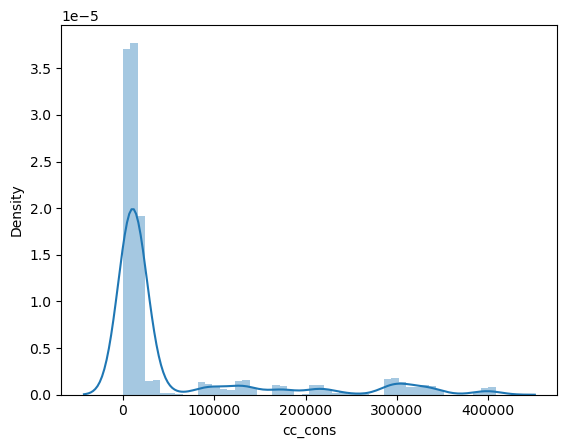

In [44]:
sns.distplot(credit_spend_existing.cc_cons)
plt.show()

In [45]:
# Graph shows data is right skewed

In [46]:
credit_spend_existing.cc_cons.skew()

2.126581960835585

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\1789515748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_existing['ln_cc_cons']= np.log(credit_spend_existing['cc_cons']+1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\1789515748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_spend_existing.ln_cc_cons)


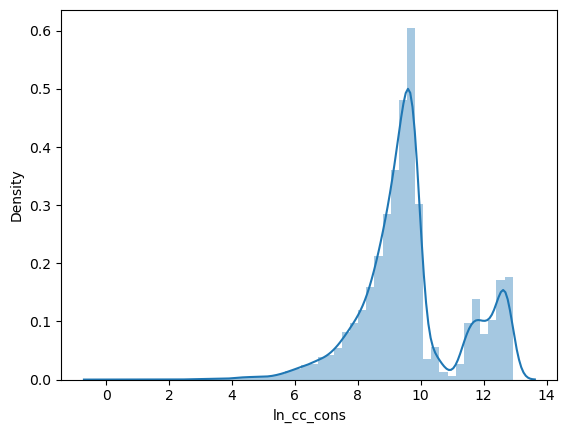

In [47]:
# apply log transformation: log is rescalling the data and making the distribution normal
credit_spend_existing['ln_cc_cons']= np.log(credit_spend_existing['cc_cons']+1)
sns.distplot(credit_spend_existing.ln_cc_cons)
plt.show()

In [48]:
credit_spend_existing.ln_cc_cons.skew()

0.09391470433219626

In [49]:
for x in ['account_type','gender', 'Income','loan_enq']:
    credit_spend_existing[x]=credit_spend_existing[x].astype('object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2626726355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_existing[x]=credit_spend_existing[x].astype('object')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2626726355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_existing[x]=credit_spend_existing[x].astype('object')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2626726355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [50]:
# creating a copy of the data
credit_spend_existing_num = credit_spend_existing.select_dtypes('number')
credit_spend_existing_cat = credit_spend_existing.select_dtypes('object')

# creating the variables with column names
cat_var_names = credit_spend_existing.select_dtypes('object').columns
numeric_var_names = credit_spend_existing.select_dtypes('float64').columns

In [51]:
credit_spend_existing_num.head(5)

,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,ln_cc_cons
0,20014.0,35,15.0,1,708.0,0,17.0,24893.00,378.00,10288.00,...,2,40,24563.0,30051.32,12761.0,2,65,50836.0,1674.09,9.904237
1,10173.0,35,15.0,6,123.0,0,14.0,18941.62,966.00,20672.00,...,2,78,23948.0,42119.05,76206.0,21,63,23226.0,13043.34,9.227591
2,16095.0,55,24.5,1,802.0,1,3.0,5678.87,2724.00,1964.50,...,2,82,10752.0,58373.25,75283.0,7,1,27036.0,25375.27,9.686326
3,7707.0,29,4.5,6,867.0,1,4.0,30489.50,1236.00,12609.88,...,23,38,12607.0,69851.51,68708.0,21,83,43037.0,3544.33,8.950014
4,96408.0,34,12.6,4,802.0,1,7.0,7441.40,6906.04,4364.00,...,24,50,25213.0,10071.00,80140.0,8,32,32044.0,12780.44,11.476355


In [52]:
credit_spend_existing_cat.head(5)

,account_type,gender,Income,loan_enq
0,current,M,MEDIUM,Y
1,current,M,HIGH,Y
2,current,M,MEDIUM,Y
3,current,F,MEDIUM,Y
4,current,M,MEDIUM,NaN


### Creating Data audit Report

In [53]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_spend_existing_num.apply(lambda x: var_summary(x)).T

In [54]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
cc_cons,15000.0,0.0,8.273659e+08,55157.729867,13364.000000,9.767097e+04,9.539619e+09,0.00,271.990000,1290.85000,2633.600000,6768.000000,13364.000000,20105.750000,219688.700000,3.098520e+05,3.952905e+05,4.083820e+05
age,15000.0,0.0,7.168590e+05,47.790600,40.000000,3.063277e+01,9.383664e+02,25.00,27.000000,28.00000,29.000000,33.000000,40.000000,53.000000,64.000000,6.600000e+01,2.220000e+02,2.230000e+02
Emp_Tenure_Years,15000.0,0.0,2.277601e+05,15.184007,9.900000,2.031265e+01,4.126037e+02,0.50,0.900000,1.70000,2.700000,5.100000,9.900000,18.000000,31.000000,4.000000e+01,1.212000e+02,2.030000e+02
Tenure_with_Bank,15000.0,0.0,8.265000e+04,5.510000,6.000000,2.865783e+00,8.212714e+00,1.00,1.000000,1.00000,2.000000,3.000000,6.000000,8.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01
region_code,15000.0,0.0,8.976232e+06,598.415467,623.000000,2.200623e+02,4.842744e+04,123.00,233.000000,249.00000,269.000000,424.000000,623.000000,799.000000,883.000000,9.370000e+02,9.680000e+02,9.740000e+02
NetBanking_Flag,15000.0,0.0,1.079300e+04,0.719533,1.000000,4.492422e-01,2.018186e-01,0.00,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Avg_days_between_transaction,14999.0,1.0,1.657330e+05,11.049603,11.000000,5.492379e+00,3.016623e+01,2.00,2.000000,2.00000,3.000000,6.000000,11.000000,16.000000,19.000000,2.000000e+01,2.000000e+01,2.000000e+01
cc_cons_apr,15000.0,0.0,2.693609e+08,17957.391719,10288.100000,2.518794e+04,6.344323e+08,253.00,658.766900,1239.40000,1918.970000,4411.027500,10288.100000,21405.000000,40998.681000,6.015714e+04,1.238253e+05,4.410313e+05
dc_cons_apr,15000.0,0.0,1.225665e+08,8171.098287,3996.900000,1.477303e+04,2.182424e+08,19.35,153.140000,376.00000,658.500000,1634.000000,3996.900000,9339.020000,18435.367000,2.783500e+04,6.480400e+04,2.292550e+05
cc_cons_may,15000.0,0.0,2.450558e+08,16337.054662,8695.030000,2.706085e+04,7.322896e+08,157.00,508.980000,1043.04000,1677.000000,3638.000000,8695.030000,18951.300000,36299.360000,5.488771e+04,1.264680e+05,1.117246e+06


In [55]:
# For categorical Variables

def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts(),x.unique()],
                    index=['N','NMISS','ColumnNames','UniqueValues'])

In [56]:
cat_summary=credit_spend_existing.apply(lambda x:cat_summary(x)).T

In [57]:
cat_summary

,N,NMISS,ColumnNames,UniqueValues
cc_cons,15000,0,cc_cons 6035.0 5 13260.0 5 6682.0 ...,"[20014.0, 10173.0, 16095.0, 7707.0, 96408.0, 1..."
account_type,15000,0,account_type current 12727 saving 2273...,"[current, saving]"
gender,15000,0,"gender M 12945 F 2055 Name: count, dtyp...","[M, F]"
age,15000,0,age 33 1290 47 921 32 809 53 ...,"[35, 55, 29, 34, 27, 32, 28, 67, 37, 46, 38, 6..."
Income,15000,0,Income MEDIUM 9612 LOW 4188 HIGH ...,"[MEDIUM, HIGH, LOW]"
Emp_Tenure_Years,15000,0,Emp_Tenure_Years 6.0 293 12.0 287 7.2...,"[15.0, 24.5, 4.5, 12.6, 4.9, 4.8, 42.3, 17.0, ..."
Tenure_with_Bank,15000,0,Tenure_with_Bank 7 1562 6 1534 10 1...,"[1, 6, 4, 3, 5, 10, 7, 2, 9, 8]"
region_code,15000,0,region_code 249.0 395 867.0 280 683.0 ...,"[708.0, 123.0, 802.0, 867.0, 958.0, 805.0, 448..."
NetBanking_Flag,15000,0,NetBanking_Flag 1 10793 0 4207 Name: co...,"[0, 1]"
Avg_days_between_transaction,14999,1,Avg_days_between_transaction 19.0 849 16.0 ...,"[17.0, 14.0, 3.0, 4.0, 7.0, 11.0, 18.0, 16.0, ..."


### Outlier Treatment

-There are some extreme high or extream low value which need to rectify so that it will not have impact on our model

In [58]:
# Handling Outliers for numerical data - Through function
credit_spend_existing_num=  credit_spend_existing_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [59]:
credit_spend_existing_num.head(2)

,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,ln_cc_cons
0,20014.0,35,15.0,1,708.0,0,17.0,24893.00,378.0,10288.0,...,2,40,24563.0,30051.32,12761.0,2,65,50836.0,1674.09,9.904237
1,10173.0,35,15.0,6,233.0,0,14.0,18941.62,966.0,20672.0,...,2,78,23948.0,42119.05,76206.0,21,63,23226.0,13043.34,9.227591


### Handling Missing Values

In [60]:
#for continuous variables
credit_spend_existing_num = credit_spend_existing_num.apply(missing_imputation)
credit_spend_existing_num.head(2)

,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,ln_cc_cons
0,20014.0,35,15.0,1,708.0,0,17.0,24893.00,378.0,10288.0,...,2,40,24563.0,30051.32,12761.0,2,65,50836.0,1674.09,9.904237
1,10173.0,35,15.0,6,233.0,0,14.0,18941.62,966.0,20672.0,...,2,78,23948.0,42119.05,76206.0,21,63,23226.0,13043.34,9.227591


In [61]:
#for categorical variables
credit_spend_existing_cat = credit_spend_existing_cat.apply(missing_imputation)
credit_spend_existing_cat.head(2)

,account_type,gender,Income,loan_enq
0,current,M,MEDIUM,Y
1,current,M,HIGH,Y


In [62]:
# Find the total number of missing values in the numerical data i.e custdata_df_num
print ("\nMissing values in numerical data :  ", credit_spend_existing_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", credit_spend_existing_cat.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


### One hot Encoding

In [63]:
# We need to create a function for dummy creation
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [64]:
credit_spend_existing_cat=credit_spend_existing.select_dtypes(include=['object'])
cat_varlist=list(credit_spend_existing_cat.columns)

In [65]:
# For customer_features in categorical features

for c_feature in cat_varlist:
    credit_spend_existing_cat[c_feature]=credit_spend_existing_cat[c_feature].astype('category')
    credit_spend_existing_cat=create_dummies(credit_spend_existing_cat,c_feature)

In [66]:
credit_spend_existing_cat.head(5)

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,False,True,False,True
1,False,True,False,False
2,False,True,False,True
3,False,False,False,True
4,False,True,False,True


### Merge Numerical and categorical data

In [67]:
df_comb = pd.concat([credit_spend_existing_num, credit_spend_existing_cat], axis=1)

In [68]:
df_comb.head(2)

,cc_cons,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,ln_cc_cons,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,20014.0,35,15.0,1,708.0,0,17.0,24893.00,378.0,10288.0,...,12761.0,2,65,50836.0,1674.09,9.904237,False,True,False,True
1,10173.0,35,15.0,6,233.0,0,14.0,18941.62,966.0,20672.0,...,76206.0,21,63,23226.0,13043.34,9.227591,False,True,False,False


In [69]:
df_comb.drop('ln_cc_cons', axis= 1, inplace=True)

In [70]:
df_comb.shape

(15000, 48)

### Model Creation 

#### Explore data and check the variable distribution for linear regression modelling

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2529402371.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comb.cc_cons)


<Axes: xlabel='cc_cons', ylabel='Density'>

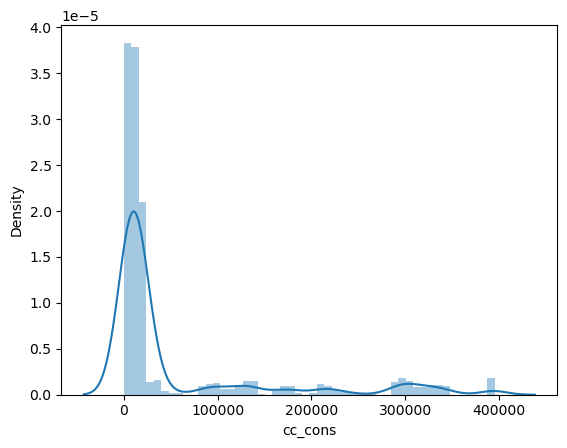

In [71]:
# For Linear regressin y(cc_cons) should follow normal distribution
import seaborn as sns
sns.distplot(df_comb.cc_cons)

In [72]:
from scipy import stats

# transform training data & save lambda value
df_comb['bc_cc_cons'],fitted_lambda = stats.boxcox(df_comb['cc_cons']+1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\2971823738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_comb.bc_cc_cons)


<Axes: xlabel='bc_cc_cons', ylabel='Density'>

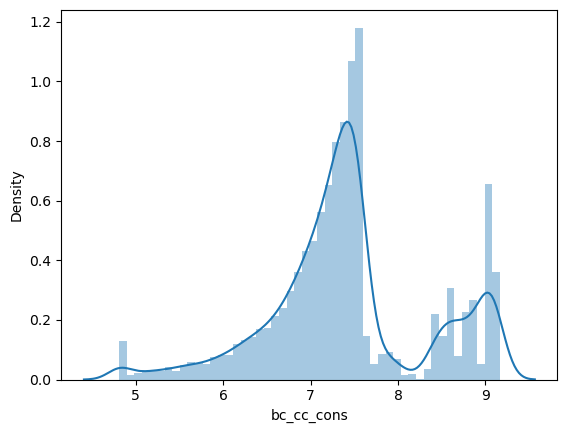

In [73]:
sns.distplot(df_comb.bc_cc_cons)

In [74]:
#Drop the y variables(cc_cons) from dataframe because we are looking correlation between all x variables

#df_comb.drop(['cc_cons'],axis=1,inplace=True)

In [75]:
df_comb.drop('bc_cc_cons', axis=1, inplace=True)

In [76]:
df_comb.columns

Index(['cc_cons', 'age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type_saving',
       'gender_M', 'Income_LOW', 'Income_MEDIUM'],
      dtype='object')

### Divide data into train and test data

In [77]:
#Splitting the data in all x variable and y variable.

In [78]:
df_excluding_cc_cons = df_comb.drop(columns=['cc_cons'])

In [79]:
feature_columns = df_excluding_cc_cons.columns

In [80]:
feature_columns

Index(['age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type_saving',
       'gender_M', 'Income_LOW', 'Income_MEDIUM'],
      dtype='object')

In [81]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(df_comb[feature_columns],
                                              df_comb['cc_cons'],
                                              test_size=0.2,
                                              random_state=42)

In [82]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

12000
3000
12000
3000


### Random Forest Regression Modelling

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [84]:
RandomForestRegressor?

In [85]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

In [86]:
# Define the parameter grid
param_grid = {'n_estimators': np.arange(5, 25)}

# Initialize the grid search
tree = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
tree.fit(train_x, train_y)


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])},
             scoring='neg_mean_squared_error')

In [87]:
tree.best_params_ 

{'n_estimators': 21}

In [88]:
radm_clf = RandomForestRegressor(oob_score=False,n_estimators=12,max_depth=None)
radm_clf.fit( train_x, train_y)

RandomForestRegressor(n_estimators=12)

In [89]:
# Use the forest's predict method on the test data
pred_y = radm_clf.predict(test_x)

In [90]:
df = pd.DataFrame({'Real Values':test_y, 'Predicted Values':pred_y})
df

,Real Values,Predicted Values
11499,11583.0,34238.915833
6475,18147.0,48062.416667
13167,11246.0,15294.750000
862,16587.0,52445.832500
5970,31951.0,69696.916667
...,...,...
6216,14311.0,120386.045833
3585,17989.0,65090.833333
10023,11805.0,26348.833333
14044,16012.0,93237.083333


In [91]:
errors = abs((pred_y - test_y)/test_y)
print('Mean Absolute Percentage Error:', round(np.mean(errors), 5)) 

Mean Absolute Percentage Error: 12.36079


In [92]:
rmspe = np.sqrt(np.mean(np.square(((test_y - pred_y) / test_y)), axis=0))
print('Root Mean Squared Percentage Error (RMSPE)::', rmspe)

Root Mean Squared Percentage Error (RMSPE):: 36.98535083365499


In [93]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, pred_y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_y, pred_y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_y, pred_y, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_y, pred_y))

Mean Absolute Error (MAE): 76960.10059388888
Mean Squared Error (MSE): 11034238335.327536
Root Mean Squared Error (RMSE): 105043.98286112126
Mean Absolute Percentage Error (MAPE): 12.36079076631152


In [94]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)

In [95]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.24 %.


In [96]:
## After building model we will apply our new model on new datasets that is credit_spend_new 

### TEST ON NEW DATASETS "CREDIT_SPEND_NEW"
### Firstly for testing the model on new datasets, we have to do some data preprocessing steps as did earlier for the modelling purpose.

In [97]:
credit_spend_new.head()

,ID,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
15000,17591,NaN,current,M,37,MEDIUM,11.9,4,575.0,1,...,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49
15001,13541,NaN,current,M,33,MEDIUM,7.8,6,394.0,0,...,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45
15002,13431,NaN,current,M,53,LOW,33.0,10,324.0,1,...,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28
15003,8687,NaN,current,M,33,MEDIUM,7.8,5,370.0,1,...,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79
15004,14727,NaN,current,M,62,LOW,12.6,9,505.0,1,...,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20


In [98]:
credit_spend_new.shape

(5000, 49)

In [99]:
credit_spend_new.drop(['cc_cons','ID'],axis=1, inplace= True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\624370847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_new.drop(['cc_cons','ID'],axis=1, inplace= True)


In [100]:
credit_spend_new.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
15000,current,M,37,MEDIUM,11.9,4,575.0,1,16.0,2795.45,...,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49
15001,current,M,33,MEDIUM,7.8,6,394.0,0,19.0,29405.13,...,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45
15002,current,M,53,LOW,33.0,10,324.0,1,15.0,5985.20,...,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28
15003,current,M,33,MEDIUM,7.8,5,370.0,1,7.0,2105.93,...,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79
15004,current,M,62,LOW,12.6,9,505.0,1,3.0,3269.00,...,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20


In [101]:
credit_spend_new.columns

Index(['account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active'],
      dtype='object')

In [102]:
for x in ['account_type','gender', 'Income','loan_enq']:
    credit_spend_new[x]=credit_spend_new[x].astype('object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3255829753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_new[x]=credit_spend_new[x].astype('object')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3255829753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_spend_new[x]=credit_spend_new[x].astype('object')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\3255829753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

### Separate numerical and categorical variable for new datasets

In [103]:
# Find numerical variable in Data frame.
# This will return a list
numeric_var_names = [key for key in dict(credit_spend_new.dtypes) if dict(credit_spend_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_names = [key for key in dict(credit_spend_new.dtypes) if dict(credit_spend_new.dtypes)[key] in ['object']]

#Print the data frame
print( numeric_var_names)
print(cat_var_names)

['age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'emi_active']
['account_type', 'gender', 'Income', 'loan_enq']


In [104]:
#Convert a list in to dataframe 
#Information about numeric variable in credit_spend_new_num

credit_spend_new_num=credit_spend_new[numeric_var_names]
credit_spend_new_num.head(5)

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
15000,37,11.9,4,575.0,1,16.0,2795.45,1290.0,6141.05,676.50,...,41755.0,24,20,9750.0,30527.88,31271.00,3,12,25945.92,1170.49
15001,33,7.8,6,394.0,0,19.0,29405.13,1640.0,1670.00,2463.92,...,130299.0,43,40,16967.0,14342.83,16582.00,6,39,12214.00,16447.45
15002,53,33.0,10,324.0,1,15.0,5985.20,6189.0,2696.09,766.00,...,40422.0,42,35,36398.0,32503.16,33539.54,5,9,13215.00,2622.28
15003,33,7.8,5,370.0,1,7.0,2105.93,18225.0,34763.56,167.00,...,48148.0,3,5,97825.0,93572.42,109429.75,21,0,72317.00,340.79
15004,62,12.6,9,505.0,1,3.0,3269.00,3532.0,3158.40,2699.77,...,25926.0,70,75,27936.0,19011.50,41401.00,6,35,42344.00,2812.20


In [105]:
credit_spend_new_cat=credit_spend_new[cat_var_names]
credit_spend_new_cat.head(5)

,account_type,gender,Income,loan_enq
15000,current,M,MEDIUM,Y
15001,current,M,MEDIUM,Y
15002,current,M,LOW,Y
15003,current,M,MEDIUM,Y
15004,current,M,LOW,Y


### Handling Outliers

In [106]:
#Handling Outliers for numerical data 
credit_spend_new_num=  credit_spend_new_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

### Handling Missing Values

In [107]:
#for categorical and continuous variables
credit_spend_new_num = credit_spend_new_num.apply(missing_imputation)
credit_spend_new_num.head()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
15000,37,11.9,4,575.0,1,16.0,2795.45,1290.0,6141.05,676.50,...,41755.0,24,20,9750.0,30527.88,31271.00,3,12,25945.92,1170.49
15001,33,7.8,6,394.0,0,19.0,29405.13,1640.0,1670.00,2463.92,...,130299.0,43,40,16967.0,14342.83,16582.00,6,39,12214.00,16447.45
15002,53,33.0,10,324.0,1,15.0,5985.20,6189.0,2696.09,766.00,...,40422.0,42,35,36398.0,32503.16,33539.54,5,9,13215.00,2622.28
15003,33,7.8,5,370.0,1,7.0,2105.93,18225.0,34763.56,167.00,...,48148.0,3,5,97825.0,93572.42,109429.75,21,0,72317.00,340.79
15004,62,12.6,9,505.0,1,3.0,3269.00,3532.0,3158.40,2699.77,...,25926.0,70,75,27936.0,19011.50,41401.00,6,35,42344.00,2812.20


In [108]:
credit_spend_new_cat = credit_spend_new_cat.apply(missing_imputation)
credit_spend_new_cat.head()

,account_type,gender,Income,loan_enq
15000,current,M,MEDIUM,Y
15001,current,M,MEDIUM,Y
15002,current,M,LOW,Y
15003,current,M,MEDIUM,Y
15004,current,M,LOW,Y


In [109]:
# Find the total number of missing values in the numerical data i.e custdata_df_num
print ("\nMissing values in numerical data :  ", credit_spend_new_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", credit_spend_new_cat.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


### Dummy Creation

In [110]:
credit_spend_new_cat=credit_spend_new_cat.select_dtypes(include=['object'])
cat_varlist=list(credit_spend_new_cat.columns)

In [111]:
# For customer_features in categorical features

for c_feature in cat_varlist:
    credit_spend_new_cat[c_feature]=credit_spend_new_cat[c_feature].astype('category')
    credit_spend_new_cat=create_dummies(credit_spend_new_cat,c_feature)

In [112]:
credit_spend_new_cat.head(5)

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
15000,False,True,False,True
15001,False,True,False,True
15002,False,True,True,False
15003,False,True,False,True
15004,False,True,True,False


In [113]:
combo_df_new = pd.concat([credit_spend_new_num, credit_spend_new_cat], axis=1)

In [114]:
combo_df_new.shape

(5000, 47)

In [115]:
combo_df_new.head()

,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
15000,37,11.9,4,575.0,1,16.0,2795.45,1290.0,6141.05,676.50,...,30527.88,31271.00,3,12,25945.92,1170.49,False,True,False,True
15001,33,7.8,6,394.0,0,19.0,29405.13,1640.0,1670.00,2463.92,...,14342.83,16582.00,6,39,12214.00,16447.45,False,True,False,True
15002,53,33.0,10,324.0,1,15.0,5985.20,6189.0,2696.09,766.00,...,32503.16,33539.54,5,9,13215.00,2622.28,False,True,True,False
15003,33,7.8,5,370.0,1,7.0,2105.93,18225.0,34763.56,167.00,...,93572.42,109429.75,21,0,72317.00,340.79,False,True,False,True
15004,62,12.6,9,505.0,1,3.0,3269.00,3532.0,3158.40,2699.77,...,19011.50,41401.00,6,35,42344.00,2812.20,False,True,True,False


In [116]:
combo_df_new.columns

Index(['age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type_saving',
       'gender_M', 'Income_LOW', 'Income_MEDIUM'],
      dtype='object')

### Making prediction on new datasets

In [117]:
# Use the forest's predict method on the test data
pred_cc_cons = radm_clf.predict(combo_df_new)

In [118]:
pred_cc_cons=pd.DataFrame(pred_cc_cons.tolist())

In [119]:
pred_cc_cons.columns = ['pred_cc_cons']
pred_cc_cons

,pred_cc_cons
0,32333.083333
1,73213.416667
2,11160.416667
3,64117.000000
4,100894.000000
...,...
4995,55426.083333
4996,58817.249167
4997,67221.583333
4998,112283.545833


In [120]:
combo_df_new.reset_index(inplace= True)
combo_df_new.head()

,index,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,Income_LOW,Income_MEDIUM
0,15000,37,11.9,4,575.0,1,16.0,2795.45,1290.0,6141.05,...,30527.88,31271.00,3,12,25945.92,1170.49,False,True,False,True
1,15001,33,7.8,6,394.0,0,19.0,29405.13,1640.0,1670.00,...,14342.83,16582.00,6,39,12214.00,16447.45,False,True,False,True
2,15002,53,33.0,10,324.0,1,15.0,5985.20,6189.0,2696.09,...,32503.16,33539.54,5,9,13215.00,2622.28,False,True,True,False
3,15003,33,7.8,5,370.0,1,7.0,2105.93,18225.0,34763.56,...,93572.42,109429.75,21,0,72317.00,340.79,False,True,False,True
4,15004,62,12.6,9,505.0,1,3.0,3269.00,3532.0,3158.40,...,19011.50,41401.00,6,35,42344.00,2812.20,False,True,True,False


In [121]:
#Concatenating final prediction with original test file
  
new_data_output = pd.concat([combo_df_new, pred_cc_cons], axis=1)

new_data_output.head()

,index,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,pred_cc_cons
0,15000,37,11.9,4,575.0,1,16.0,2795.45,1290.0,6141.05,...,31271.00,3,12,25945.92,1170.49,False,True,False,True,32333.083333
1,15001,33,7.8,6,394.0,0,19.0,29405.13,1640.0,1670.00,...,16582.00,6,39,12214.00,16447.45,False,True,False,True,73213.416667
2,15002,53,33.0,10,324.0,1,15.0,5985.20,6189.0,2696.09,...,33539.54,5,9,13215.00,2622.28,False,True,True,False,11160.416667
3,15003,33,7.8,5,370.0,1,7.0,2105.93,18225.0,34763.56,...,109429.75,21,0,72317.00,340.79,False,True,False,True,64117.000000
4,15004,62,12.6,9,505.0,1,3.0,3269.00,3532.0,3158.40,...,41401.00,6,35,42344.00,2812.20,False,True,True,False,100894.000000


In [122]:
new_data_output.to_csv('credit_spend_new_output.csv')

In [123]:
## That is the final output which we want on our new data sets, the predicted credit_consumption for new 5000 customers.

#### Feature Importance using Random Forest ( .feature_importances_): Method1

In [124]:
from sklearn import metrics

<Axes: xlabel='importance', ylabel='feature'>

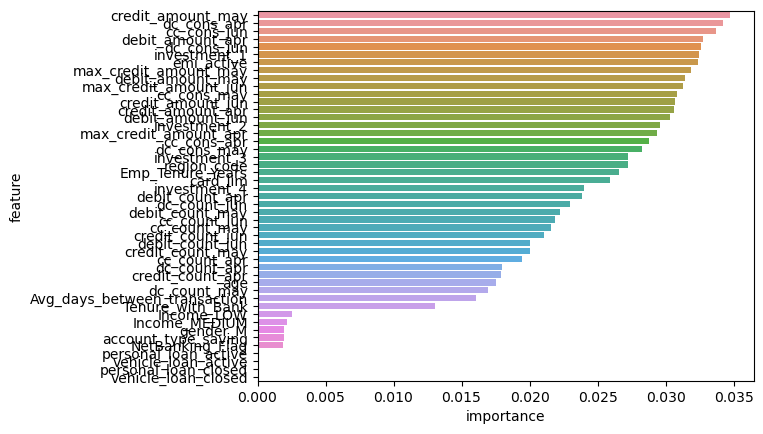

In [125]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [126]:
#As above graph is not clear so we will use below method

In [127]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,credit_amount_may,0.034729
1,2,dc_cons_apr,0.034250
2,3,cc_cons_jun,0.033690
3,4,debit_amount_apr,0.032746
4,5,dc_cons_jun,0.032635
5,6,investment_1,0.032486
6,7,emi_active,0.032380
7,8,max_credit_amount_may,0.031897
8,9,debit_amount_may,0.031442
9,10,max_credit_amount_jun,0.031285


In [128]:
#Select features and then convert it into list
x=feature_rank.loc[0:75,['feature']]
x=x['feature'].tolist()
print(x)

['credit_amount_may', 'dc_cons_apr', 'cc_cons_jun', 'debit_amount_apr', 'dc_cons_jun', 'investment_1', 'emi_active', 'max_credit_amount_may', 'debit_amount_may', 'max_credit_amount_jun', 'cc_cons_may', 'credit_amount_jun', 'credit_amount_apr', 'debit_amount_jun', 'investment_2', 'max_credit_amount_apr', 'cc_cons_apr', 'dc_cons_may', 'investment_3', 'region_code', 'Emp_Tenure_Years', 'card_lim', 'investment_4', 'debit_count_apr', 'dc_count_jun', 'debit_count_may', 'cc_count_jun', 'cc_count_may', 'credit_count_jun', 'debit_count_jun', 'credit_count_may', 'cc_count_apr', 'dc_count_apr', 'credit_count_apr', 'age', 'dc_count_may', 'Avg_days_between_transaction', 'Tenure_with_Bank', 'Income_LOW', 'Income_MEDIUM', 'gender_M', 'account_type_saving', 'NetBanking_Flag', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed']


In [129]:
# Create data frame with selected features
rf_features=['emi_active', 'cc_cons_may', 'cc_cons_apr', 'cc_cons_jun', 'max_credit_amount_jun', 
             'investment_1', 'debit_amount_may', 'credit_amount_apr', 'max_credit_amount_apr', 
             'dc_cons_jun', 'dc_cons_apr', 'debit_amount_jun', 'max_credit_amount_may',
             'credit_amount_jun', 'debit_amount_apr', 'credit_amount_may', 'dc_cons_may', 
             'investment_3', 'investment_2', 'Emp_Tenure_Years', 'card_lim', 'region_code', 'investment_4',
             'cc_count_jun', 
             'debit_count_jun', 'debit_count_apr', 'cc_count_may', 'debit_count_may', 'age', 'credit_count_may', 
             'credit_count_jun', 'Avg_days_between_transaction', 'dc_count_jun', 'cc_count_apr', 'dc_count_may', 
             'dc_count_apr', 'credit_count_apr', 'Tenure_with_Bank', 'NetBanking_Flag', 'account_type_saving',
             'Income_LOW', 'gender_M', 
             'Income_MEDIUM', 'vehicle_loan_active', 'personal_loan_active', 'personal_loan_closed', 'vehicle_loan_closed']
rf_features.append('cc_cons')
df_rf= df_comb[rf_features]

df_rf.head(5)

,emi_active,cc_cons_may,cc_cons_apr,cc_cons_jun,max_credit_amount_jun,investment_1,debit_amount_may,credit_amount_apr,max_credit_amount_apr,dc_cons_jun,...,NetBanking_Flag,account_type_saving,Income_LOW,gender_M,Income_MEDIUM,vehicle_loan_active,personal_loan_active,personal_loan_closed,vehicle_loan_closed,cc_cons
0,1674.09,10288.00,24893.00,16291.40,50836.0,593.20,11527.50,25192.00,25296.0,11432.00,...,0,False,False,True,True,1,1,1.0,1,20014.0
1,13043.34,20672.00,18941.62,4217.00,23226.0,213557.15,92276.57,88693.37,80750.0,885.00,...,0,False,False,True,False,1,1,1.0,1,10173.0
2,25375.27,1964.50,5678.87,23956.25,27036.0,165907.57,19343.00,84880.00,38466.0,5168.00,...,1,False,False,True,True,1,1,1.0,1,16095.0
3,3544.33,12609.88,30489.50,17521.00,43037.0,81872.65,43867.91,236326.00,52732.0,13650.30,...,1,False,False,False,True,1,1,1.0,1,7707.0
4,12780.44,4364.00,7441.40,2121.00,32044.0,568.80,153253.71,58897.03,19613.0,6829.18,...,1,False,False,True,True,1,1,1.0,1,96408.0


### Variable Importances ( Method :2)
In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. we can use the numbers to make relative comparisons between variables.

In [130]:
# Get numerical feature importances
importances = list(radm_clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(credit_spend_existing_fin, round(importance, 5)) for credit_spend_existing_fin, importance in zip(feature_columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: credit_amount_may    Importance: 0.03473
Variable: dc_cons_apr          Importance: 0.03425
Variable: cc_cons_jun          Importance: 0.03369
Variable: debit_amount_apr     Importance: 0.03275
Variable: dc_cons_jun          Importance: 0.03263
Variable: investment_1         Importance: 0.03249
Variable: emi_active           Importance: 0.03238
Variable: max_credit_amount_may Importance: 0.0319
Variable: debit_amount_may     Importance: 0.03144
Variable: max_credit_amount_jun Importance: 0.03129
Variable: cc_cons_may          Importance: 0.03081
Variable: credit_amount_jun    Importance: 0.03066
Variable: credit_amount_apr    Importance: 0.03062
Variable: debit_amount_jun     Importance: 0.03035
Variable: investment_2         Importance: 0.02962
Variable: max_credit_amount_apr Importance: 0.02934
Variable: cc_cons_apr          Importance: 0.02875
Variable: dc_cons_may          Importance: 0.02825
Variable: investment_3         Importance: 0.02726
Variable: region_code        

### Visualizations

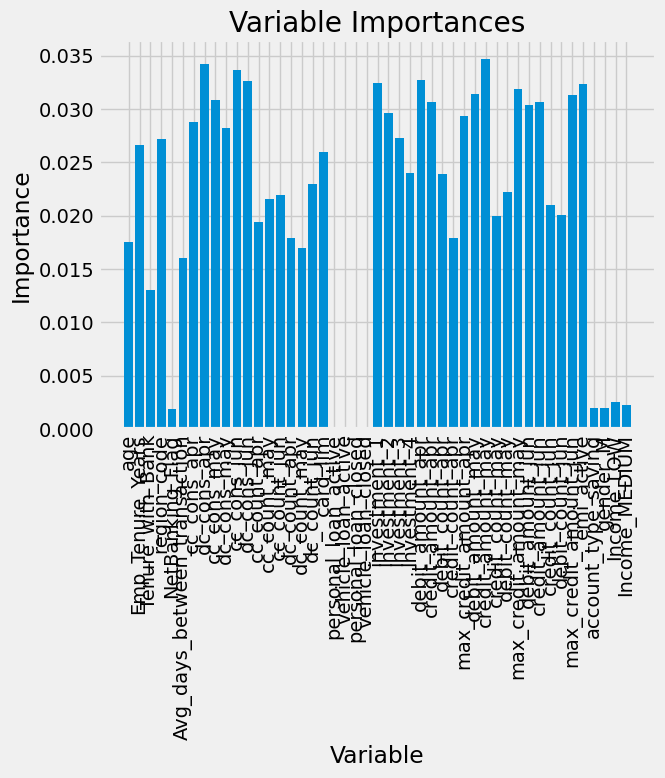

In [131]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Check - 2: Find multicolinearlity : using VIF

In [132]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [133]:
del rf_features[-1]

In [134]:
df_rf['ln_cc_cons']= np.log(df_rf['cc_cons']+1)
rf_features=df_rf.columns
rf_features

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\1181543194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf['ln_cc_cons']= np.log(df_rf['cc_cons']+1)


Index(['emi_active', 'cc_cons_may', 'cc_cons_apr', 'cc_cons_jun',
       'max_credit_amount_jun', 'investment_1', 'debit_amount_may',
       'credit_amount_apr', 'max_credit_amount_apr', 'dc_cons_jun',
       'dc_cons_apr', 'debit_amount_jun', 'max_credit_amount_may',
       'credit_amount_jun', 'debit_amount_apr', 'credit_amount_may',
       'dc_cons_may', 'investment_3', 'investment_2', 'Emp_Tenure_Years',
       'card_lim', 'region_code', 'investment_4', 'cc_count_jun',
       'debit_count_jun', 'debit_count_apr', 'cc_count_may', 'debit_count_may',
       'age', 'credit_count_may', 'credit_count_jun',
       'Avg_days_between_transaction', 'dc_count_jun', 'cc_count_apr',
       'dc_count_may', 'dc_count_apr', 'credit_count_apr', 'Tenure_with_Bank',
       'NetBanking_Flag', 'account_type_saving', 'Income_LOW', 'gender_M',
       'Income_MEDIUM', 'vehicle_loan_active', 'personal_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'cc_cons', 'ln_cc_cons'],
      dtype=

In [135]:
%%capture
#gather features
features = "+".join(rf_features)

In [136]:
features

'emi_active+cc_cons_may+cc_cons_apr+cc_cons_jun+max_credit_amount_jun+investment_1+debit_amount_may+credit_amount_apr+max_credit_amount_apr+dc_cons_jun+dc_cons_apr+debit_amount_jun+max_credit_amount_may+credit_amount_jun+debit_amount_apr+credit_amount_may+dc_cons_may+investment_3+investment_2+Emp_Tenure_Years+card_lim+region_code+investment_4+cc_count_jun+debit_count_jun+debit_count_apr+cc_count_may+debit_count_may+age+credit_count_may+credit_count_jun+Avg_days_between_transaction+dc_count_jun+cc_count_apr+dc_count_may+dc_count_apr+credit_count_apr+Tenure_with_Bank+NetBanking_Flag+account_type_saving+Income_LOW+gender_M+Income_MEDIUM+vehicle_loan_active+personal_loan_active+personal_loan_closed+vehicle_loan_closed+cc_cons+ln_cc_cons'

In [137]:
# get y and X dataframes based on this regression:
y, X = dmatrices('ln_cc_cons~' + features,df_rf, return_type='dataframe')

In [138]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [139]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
4,3.244121,Income_MEDIUM[T.True]
2,3.243761,Income_LOW[T.True]
49,3.156106,ln_cc_cons
48,3.154870,cc_cons
33,2.999633,age
24,2.998186,Emp_Tenure_Years
6,1.004655,cc_cons_may
29,1.004454,debit_count_jun
26,1.003855,region_code
21,1.003760,dc_cons_may


In [140]:
vif1=vif[vif['VIF Factor']<10].reset_index().loc[:,['features']]
vif1

,features
0,Intercept
1,account_type_saving[T.True]
2,Income_LOW[T.True]
3,gender_M[T.True]
4,Income_MEDIUM[T.True]
5,emi_active
6,cc_cons_may
7,cc_cons_apr
8,cc_cons_jun
9,max_credit_amount_jun


In [141]:
df_rf.shape

(15000, 49)

### Check 3 - All x variables should have a linear relationship with Y

#### To build model again splitting data for training and testing

In [142]:
# Dropping variables one at a time which have p-values greater than 5%
feature_columns=df_rf.columns.difference(['ln_cc_cons','Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income_LOW', 'Income_MEDIUM',
                                          'NetBanking_Flag', 'Tenure_with_Bank', 'account_type_saving', 'age', 
                                          'card_lim', 'cc_cons', 'cc_cons_apr', 'cc_cons_jun', 'cc_cons_may', 'cc_count_apr', 'cc_count_jun',
                                          'cc_count_may', 'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may', 'credit_count_apr', 
                                          'credit_count_jun', 'credit_count_may', 'dc_cons_apr', 'dc_cons_jun', 'dc_cons_may', 'dc_count_apr', 
                                          'dc_count_jun', 'dc_count_may', 'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may', 'debit_count_apr',
                                          'debit_count_jun', 'debit_count_may', 'emi_active', 'gender_M', 'investment_1', 'investment_2', 'investment_3', 
                                          'investment_4', 'max_credit_amount_apr', 'max_credit_amount_jun', 'max_credit_amount_may', ])
print(list(feature_columns))

['personal_loan_active', 'personal_loan_closed', 'region_code', 'vehicle_loan_active', 'vehicle_loan_closed']


In [143]:
train_x,test_x,train_y,test_y=train_test_split(df_rf[feature_columns],
                                              df_rf['ln_cc_cons'],
                                               test_size=.2,
                                               random_state=123)

#### Build Regression model using statsmodels.api

In [144]:
import statsmodels.api as sm

In [145]:
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

In [146]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             ln_cc_cons   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9816
Date:                Tue, 16 Jul 2024   Prob (F-statistic):              0.322
Time:                        19:55:47   Log-Likelihood:                -22550.
No. Observations:               12000   AIC:                         4.510e+04
Df Residuals:                   11998   BIC:                         4.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
personal_loan_active     2.4229 

In [147]:
lm.pvalues.sort_values(ascending=False)

region_code             0.321833
personal_loan_active    0.000000
personal_loan_closed    0.000000
vehicle_loan_active     0.000000
vehicle_loan_closed     0.000000
dtype: float64

In [148]:
print('Parameters:', lm.params) # Find the parameters of x i.e Beta value
print('R2: ', lm.rsquared) # Find the r**2

Parameters: personal_loan_active    2.422876
personal_loan_closed    2.422876
region_code            -0.000066
vehicle_loan_active     2.422876
vehicle_loan_closed     2.422876
dtype: float64
R2:  8.180395700796428e-05


### Evaluation of model accuracy

In [149]:
test_pred=lm.predict(test_x)
train_pred=lm.predict(train_x)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 2.425444407617333
MSE Train: 2.5106014200120366


In [150]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.1337071834027301
MSE: 2.425444407617333
RMSE: 1.557383834389369


In [151]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.124  |  MAPE of testing data:  0.121


### Check 4: Normality of Residuals

#### We will use Q-Q plot to examine this

C:\Users\DELL\AppData\Local\Temp\ipykernel_16112\731382735.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

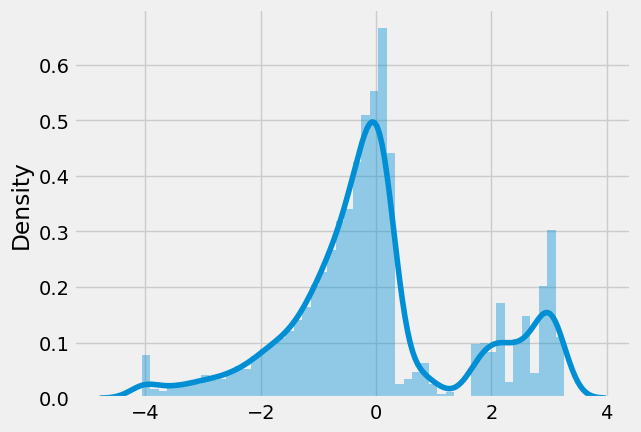

In [152]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

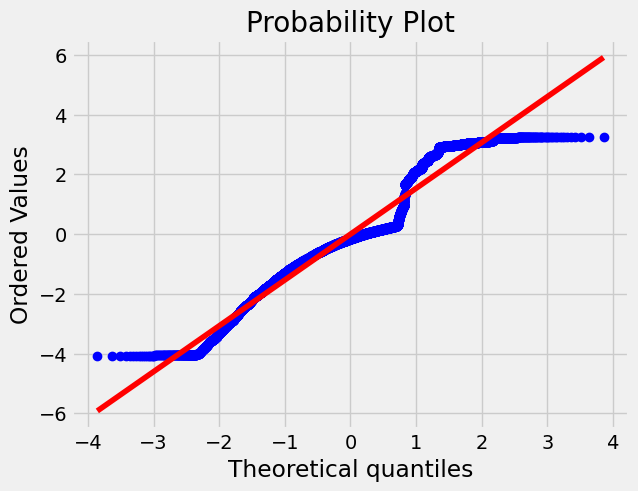

In [153]:
from scipy import stats
import pylab

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

### As a final note, on this datasets we make Random Forest Regressor model as our target variable is not normally distributed. 